In [1]:
import pandas as pd
import numpy as np
import dask.array as da
import dask.dataframe as dd
import time
import math
#import graphviz
from netCDF4 import Dataset
import os,datetime,sys,fnmatch
import h5py

In [15]:
def read_filelist(loc_dir,prefix,unie,fileformat):
    # Read the filelist in the specific directory
    str = os.popen("ls "+ loc_dir + prefix + unie + "*."+fileformat).read()
    fname = np.array(str.split("\n"))
    fname = np.delete(fname,len(fname)-1)
    
    return fname

def read_MODIS(fname1,fname2,verbose=False): # READ THE HDF FILE
    # Read the cloud mask from MYD06_L2 product')
    ncfile=Dataset(fname1,'r')
    CM1km = np.array(ncfile.variables['Cloud_Mask_1km'])
    CM   = (np.array(CM1km[:,:,0],dtype='byte') & 0b00000110) >>1
    ncfile.close()
    
    ncfile=Dataset(fname2,'r')
    lat  = np.array(ncfile.variables['Latitude'])
    lon  = np.array(ncfile.variables['Longitude'])
    attr_lat = ncfile.variables['Latitude']._FillValue
    attr_lon = ncfile.variables['Longitude']._FillValue
    
    return lat,lon,CM

def countzero(x, axis=1):
    #print(x)
    count0 = 0
    count1 = 0
    for i in x:
        if i <= 1:
            count0 +=1
    #print(count0/len(x))
    return (count0/len(x))

def results(concat_list):
    b2=pd.concat(b1)
    b_2=b2.groupby(['Latitude','Longitude']).mean()
    b3=b_2.reset_index()
    combs=[]
    for x in range(0,180):
        for y in range(0,360):
            combs.append((x, y))
    df_1=pd.DataFrame(combs)
    df_1.columns=['Latitude','Longitude']
    df4=pd.merge(df_1, b3,on=('Latitude','Longitude'), how='left')
    df_cm=df4['CM'].values
    np_cm=df_cm.reshape(180,360)
    return np_cm


In [5]:
MYD06_dir= '/Users/dprakas1/Desktop/modis_oneday/'
MYD06_prefix = 'MYD06_L2.A2008'
MYD03_dir= '/Users/dprakas1/Desktop/modis_oneday/'
MYD03_prefix = 'MYD03.A2008'
fileformat = 'hdf'

fname1,fname2 = [],[]


days = np.arange(1,31,dtype=np.int)
for day in days:
    dc ='%03i' % day
    fname_tmp1 = read_filelist(MYD06_dir,MYD06_prefix,dc,fileformat)
    fname_tmp2 = read_filelist(MYD03_dir,MYD03_prefix,dc,fileformat)
    fname1 = np.append(fname1,fname_tmp1)
    fname2 = np.append(fname2,fname_tmp2)

# Initiate the number of day and total cloud fraction
files  = np.arange(len(fname1))



for j in range(0,1):#hdfs:
    print('steps: ',j+1,'/ ',(fname1)) 

    # Read Level-2 MODIS data
    lat,lon,CM = read_MODIS(fname1[j],fname2[j])
print((fname2))
#rint(CM)
#lat = lat.ravel()
#lon = lon.ravel()
#CM  = CM.ravel()
CM.shape


steps:  1 /  ['/Users/dprakas1/Desktop/modis_oneday/MYD06_L2.A2008001.0000.006.2013341193524.hdf'
 '/Users/dprakas1/Desktop/modis_oneday/MYD06_L2.A2008001.0005.006.2013341193207.hdf'
 '/Users/dprakas1/Desktop/modis_oneday/MYD06_L2.A2008001.0010.006.2013341192125.hdf'
 '/Users/dprakas1/Desktop/modis_oneday/MYD06_L2.A2008001.0015.006.2013341193150.hdf'
 '/Users/dprakas1/Desktop/modis_oneday/MYD06_L2.A2008001.0020.006.2013341193235.hdf'
 '/Users/dprakas1/Desktop/modis_oneday/MYD06_L2.A2008001.0025.006.2013341192801.hdf'
 '/Users/dprakas1/Desktop/modis_oneday/MYD06_L2.A2008001.0030.006.2013341193002.hdf'
 '/Users/dprakas1/Desktop/modis_oneday/MYD06_L2.A2008001.0035.006.2013341193634.hdf'
 '/Users/dprakas1/Desktop/modis_oneday/MYD06_L2.A2008001.0040.006.2013341200201.hdf'
 '/Users/dprakas1/Desktop/modis_oneday/MYD06_L2.A2008001.0045.006.2013341200648.hdf'
 '/Users/dprakas1/Desktop/modis_oneday/MYD06_L2.A2008001.0050.006.2013341205630.hdf'
 '/Users/dprakas1/Desktop/modis_oneday/MYD06_L2.A200

['/Users/dprakas1/Desktop/modis_oneday/MYD03.A2008001.0000.006.2012066122450.hdf'
 '/Users/dprakas1/Desktop/modis_oneday/MYD03.A2008001.0005.006.2012066122516.hdf'
 '/Users/dprakas1/Desktop/modis_oneday/MYD03.A2008001.0010.006.2012066122416.hdf'
 '/Users/dprakas1/Desktop/modis_oneday/MYD03.A2008001.0015.006.2012066122424.hdf'
 '/Users/dprakas1/Desktop/modis_oneday/MYD03.A2008001.0020.006.2012066122516.hdf'
 '/Users/dprakas1/Desktop/modis_oneday/MYD03.A2008001.0025.006.2012066122634.hdf'
 '/Users/dprakas1/Desktop/modis_oneday/MYD03.A2008001.0030.006.2012066125916.hdf'
 '/Users/dprakas1/Desktop/modis_oneday/MYD03.A2008001.0035.006.2012066130550.hdf'
 '/Users/dprakas1/Desktop/modis_oneday/MYD03.A2008001.0040.006.2012201150018.hdf'
 '/Users/dprakas1/Desktop/modis_oneday/MYD03.A2008001.0045.006.2012201144820.hdf'
 '/Users/dprakas1/Desktop/modis_oneday/MYD03.A2008001.0050.006.2012201144257.hdf'
 '/Users/dprakas1/Desktop/modis_oneday/MYD03.A2008001.0055.006.2012066122702.hdf'
 '/Users/dprakas

(2030, 1354)

In [6]:
b1=[]

for x,y in zip(fname1,fname2):
    cm = np.zeros((2030,1354), dtype=np.float32)
    lat = np.zeros((2030,1354), dtype=np.float32)
    lon = np.zeros((2030,1354), dtype=np.float32)
    print(x,y)
    myd06 = Dataset(x, "r")
    CM = myd06.variables["Cloud_Mask_1km"][:,:,0]# Reading Specific Variable 'Cloud_Mask_1km'.
    CM = (np.array(CM,dtype='byte') & 0b00000110) >>1
    CM = np.array(CM).byteswap().newbyteorder()
    #print("CM intial shape:",CM.shape)
    cm = np.concatenate((cm,CM))
    #print("CM shape after con:",cm.shape)
    cm=np.ravel(cm)
    #print("cm shape after ravel:",cm.shape)
    myd03 = Dataset(y, "r")
    latitude = myd03.variables["Latitude"][:,:]
    longitude = myd03.variables["Longitude"][:,:]
    #print("Lat intial shape:",latitude.shape)
    #print("lon intial shape:",longitude.shape)
    
    
    lat = np.concatenate((lat,latitude))
    lon = np.concatenate((lon,longitude))
    #print("lat shape after con:",lat.shape)
    #print("lon shape after con:",lon.shape)
    
    lat=np.ravel(lat)
    lon=np.ravel(lon)
    
    #print("lat shape after ravel:",lat.shape)
    #print("lon shape after ravel:",lon.shape)
    cm=cm.astype(int)
    lon=lon.astype(int)
    lat=lat.astype(int)
    
    lat=lat+90
    lon=lon+180
    
    
    d = {'Latitude' :  pd.Series(lat), 'Longitude' : pd.Series(lon),'CM':pd.Series(cm)} #Reading the values in a pandas dataframe
    df = pd.DataFrame(d,columns=['Latitude', 'Longitude','CM'])
    #print(df.head())
    df2=df.groupby(['Longitude','Latitude']).CM.apply(countzero)
    df3=df2.reset_index()
    b1.append(df3)
   

/Users/dprakas1/Desktop/modis_oneday/MYD06_L2.A2008001.0000.006.2013341193524.hdf /Users/dprakas1/Desktop/modis_oneday/MYD03.A2008001.0000.006.2012066122450.hdf
/Users/dprakas1/Desktop/modis_oneday/MYD06_L2.A2008001.0005.006.2013341193207.hdf /Users/dprakas1/Desktop/modis_oneday/MYD03.A2008001.0005.006.2012066122516.hdf
/Users/dprakas1/Desktop/modis_oneday/MYD06_L2.A2008001.0010.006.2013341192125.hdf /Users/dprakas1/Desktop/modis_oneday/MYD03.A2008001.0010.006.2012066122416.hdf
/Users/dprakas1/Desktop/modis_oneday/MYD06_L2.A2008001.0015.006.2013341193150.hdf /Users/dprakas1/Desktop/modis_oneday/MYD03.A2008001.0015.006.2012066122424.hdf
/Users/dprakas1/Desktop/modis_oneday/MYD06_L2.A2008001.0020.006.2013341193235.hdf /Users/dprakas1/Desktop/modis_oneday/MYD03.A2008001.0020.006.2012066122516.hdf
/Users/dprakas1/Desktop/modis_oneday/MYD06_L2.A2008001.0025.006.2013341192801.hdf /Users/dprakas1/Desktop/modis_oneday/MYD03.A2008001.0025.006.2012066122634.hdf
/Users/dprakas1/Desktop/modis_oned

/Users/dprakas1/Desktop/modis_oneday/MYD06_L2.A2008001.0415.006.2013341195931.hdf /Users/dprakas1/Desktop/modis_oneday/MYD03.A2008001.0415.006.2012066122307.hdf
/Users/dprakas1/Desktop/modis_oneday/MYD06_L2.A2008001.0420.006.2013341202258.hdf /Users/dprakas1/Desktop/modis_oneday/MYD03.A2008001.0420.006.2012066122334.hdf
/Users/dprakas1/Desktop/modis_oneday/MYD06_L2.A2008001.0425.006.2013341204103.hdf /Users/dprakas1/Desktop/modis_oneday/MYD03.A2008001.0425.006.2012066122207.hdf
/Users/dprakas1/Desktop/modis_oneday/MYD06_L2.A2008001.0430.006.2013341203408.hdf /Users/dprakas1/Desktop/modis_oneday/MYD03.A2008001.0430.006.2012066122304.hdf
/Users/dprakas1/Desktop/modis_oneday/MYD06_L2.A2008001.0435.006.2013341202734.hdf /Users/dprakas1/Desktop/modis_oneday/MYD03.A2008001.0435.006.2012066122229.hdf
/Users/dprakas1/Desktop/modis_oneday/MYD06_L2.A2008001.0440.006.2013341195809.hdf /Users/dprakas1/Desktop/modis_oneday/MYD03.A2008001.0440.006.2012066122337.hdf
/Users/dprakas1/Desktop/modis_oned

/Users/dprakas1/Desktop/modis_oneday/MYD06_L2.A2008001.0830.006.2013341195711.hdf /Users/dprakas1/Desktop/modis_oneday/MYD03.A2008001.0830.006.2012066130322.hdf
/Users/dprakas1/Desktop/modis_oneday/MYD06_L2.A2008001.0835.006.2013341194032.hdf /Users/dprakas1/Desktop/modis_oneday/MYD03.A2008001.0835.006.2012066130122.hdf
/Users/dprakas1/Desktop/modis_oneday/MYD06_L2.A2008001.0840.006.2013341193259.hdf /Users/dprakas1/Desktop/modis_oneday/MYD03.A2008001.0840.006.2012066130043.hdf
/Users/dprakas1/Desktop/modis_oneday/MYD06_L2.A2008001.0845.006.2013341194408.hdf /Users/dprakas1/Desktop/modis_oneday/MYD03.A2008001.0845.006.2012066130224.hdf
/Users/dprakas1/Desktop/modis_oneday/MYD06_L2.A2008001.0850.006.2013341194529.hdf /Users/dprakas1/Desktop/modis_oneday/MYD03.A2008001.0850.006.2012066130849.hdf
/Users/dprakas1/Desktop/modis_oneday/MYD06_L2.A2008001.0855.006.2013341200825.hdf /Users/dprakas1/Desktop/modis_oneday/MYD03.A2008001.0855.006.2012066132426.hdf
/Users/dprakas1/Desktop/modis_oned

/Users/dprakas1/Desktop/modis_oneday/MYD06_L2.A2008001.1245.006.2013341200705.hdf /Users/dprakas1/Desktop/modis_oneday/MYD03.A2008001.1245.006.2012066132932.hdf
/Users/dprakas1/Desktop/modis_oneday/MYD06_L2.A2008001.1250.006.2013341202511.hdf /Users/dprakas1/Desktop/modis_oneday/MYD03.A2008001.1250.006.2012066133023.hdf
/Users/dprakas1/Desktop/modis_oneday/MYD06_L2.A2008001.1255.006.2013341200939.hdf /Users/dprakas1/Desktop/modis_oneday/MYD03.A2008001.1255.006.2012066132918.hdf
/Users/dprakas1/Desktop/modis_oneday/MYD06_L2.A2008001.1300.006.2013341201614.hdf /Users/dprakas1/Desktop/modis_oneday/MYD03.A2008001.1300.006.2012066133424.hdf
/Users/dprakas1/Desktop/modis_oneday/MYD06_L2.A2008001.1305.006.2013341212013.hdf /Users/dprakas1/Desktop/modis_oneday/MYD03.A2008001.1305.006.2012066124221.hdf
/Users/dprakas1/Desktop/modis_oneday/MYD06_L2.A2008001.1310.006.2013341193744.hdf /Users/dprakas1/Desktop/modis_oneday/MYD03.A2008001.1310.006.2012066122950.hdf
/Users/dprakas1/Desktop/modis_oned

/Users/dprakas1/Desktop/modis_oneday/MYD06_L2.A2008001.1700.006.2013341194432.hdf /Users/dprakas1/Desktop/modis_oneday/MYD03.A2008001.1700.006.2012066125902.hdf
/Users/dprakas1/Desktop/modis_oneday/MYD06_L2.A2008001.1705.006.2013341194758.hdf /Users/dprakas1/Desktop/modis_oneday/MYD03.A2008001.1705.006.2012066130506.hdf
/Users/dprakas1/Desktop/modis_oneday/MYD06_L2.A2008001.1710.006.2013341201845.hdf /Users/dprakas1/Desktop/modis_oneday/MYD03.A2008001.1710.006.2012066131615.hdf
/Users/dprakas1/Desktop/modis_oneday/MYD06_L2.A2008001.1715.006.2013341202850.hdf /Users/dprakas1/Desktop/modis_oneday/MYD03.A2008001.1715.006.2012066130418.hdf
/Users/dprakas1/Desktop/modis_oneday/MYD06_L2.A2008001.1720.006.2013341203016.hdf /Users/dprakas1/Desktop/modis_oneday/MYD03.A2008001.1720.006.2012066130436.hdf
/Users/dprakas1/Desktop/modis_oneday/MYD06_L2.A2008001.1725.006.2013341202044.hdf /Users/dprakas1/Desktop/modis_oneday/MYD03.A2008001.1725.006.2012066130320.hdf
/Users/dprakas1/Desktop/modis_oned

/Users/dprakas1/Desktop/modis_oneday/MYD06_L2.A2008001.2115.006.2013341194539.hdf /Users/dprakas1/Desktop/modis_oneday/MYD03.A2008001.2115.006.2012066125838.hdf
/Users/dprakas1/Desktop/modis_oneday/MYD06_L2.A2008001.2120.006.2013341201517.hdf /Users/dprakas1/Desktop/modis_oneday/MYD03.A2008001.2120.006.2012066125818.hdf
/Users/dprakas1/Desktop/modis_oneday/MYD06_L2.A2008001.2125.006.2013341201337.hdf /Users/dprakas1/Desktop/modis_oneday/MYD03.A2008001.2125.006.2012066125131.hdf
/Users/dprakas1/Desktop/modis_oneday/MYD06_L2.A2008001.2130.006.2013341195634.hdf /Users/dprakas1/Desktop/modis_oneday/MYD03.A2008001.2130.006.2012066123427.hdf
/Users/dprakas1/Desktop/modis_oneday/MYD06_L2.A2008001.2135.006.2013341194733.hdf /Users/dprakas1/Desktop/modis_oneday/MYD03.A2008001.2135.006.2012066123354.hdf
/Users/dprakas1/Desktop/modis_oneday/MYD06_L2.A2008001.2140.006.2013341194847.hdf /Users/dprakas1/Desktop/modis_oneday/MYD03.A2008001.2140.006.2012066123408.hdf
/Users/dprakas1/Desktop/modis_oned

In [18]:
Final_CF_array=results(b1)
Final_CF_array

array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan, 0.86831316, 0.83195949, ..., 0.87920459, 0.85215272,
        0.87195213],
       [       nan, 0.96793134, 0.96984359, ..., 0.93575041, 0.94747866,
        0.94549784],
       ...,
       [       nan, 0.68581926, 0.711426  , ..., 0.66175728, 0.66247464,
        0.6656936 ],
       [       nan, 0.90545275, 0.90364372, ..., 0.90324344, 0.89874411,
        0.90612122],
       [       nan, 0.98809524, 0.99795918, ..., 0.98841699, 1.        ,
        0.98351648]])

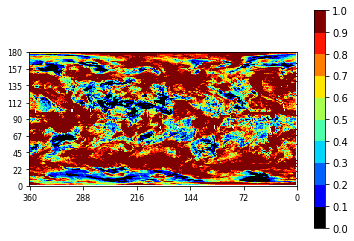

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import calendar
import pprint
data = Final_CF_array

data_shape = data.shape

cmap = [(0.0,0.0,0.0)] + [(cm.jet(i)) for i in range(1,256)] 
cmap = mpl.colors.ListedColormap(cmap)

bounds = [0.0, 0.1, 0.2 , 0.3 , 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

img = plt.imshow(np.fliplr(data), cmap=cmap, norm=norm,
                  interpolation='none', origin='lower')

cbar_bounds = [0.0, 0.1, 0.2 , 0.3 , 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
cbar_ticks = [0.0, 0.1, 0.2 , 0.3 , 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]             
               
cbar = plt.colorbar(img, cmap=cmap, norm=norm, boundaries=cbar_bounds, ticks=cbar_ticks)
cbar.ax.set_yticklabels(cbar_ticks, fontsize=10)

l = [int(i) for i in np.linspace(0,data_shape[1],6)]
plt.xticks(l, [i for i in reversed(l)], rotation=0, fontsize=8 )

l = [int(i) for i in np.linspace(0,data_shape[0],9)]
plt.yticks(l, l, rotation=0, fontsize=8 )

title = 'Cloud Fraction \n MYD06 C6 ({}-{:02d}-{:02d}; {:02d}h{:02d})'
#plt.title(title.format( year, month, day, hh, mm), fontsize=10)

plt.show()